<a href="https://colab.research.google.com/github/Shubham01-T/Ecommerce_Data_Analysis/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose



#Suppress all warnings
warnings.filterwarnings("ignore")
#Set the style for seaborn
sns.set(style="whitegrid")

In [2]:
df= pd.read_csv('/content/retail_data.csv')

In [3]:
df.columns.values

array(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone',
       'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender',
       'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time',
       'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category',
       'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
       'Payment_Method', 'Order_Status', 'Ratings', 'products'],
      dtype=object)

In [4]:
df.shape

(302010, 30)

In [5]:
df.isnull().sum()

,0
Transaction_ID,333
Customer_ID,308
Name,382
Email,347
Phone,362
Address,315
City,248
State,281
Zipcode,340
Country,271


In [6]:
data = df
data = data.dropna()
data.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
Name,0
Email,0
Phone,0
Address,0
City,0
State,0
Zipcode,0
Country,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293911 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    293911 non-null  float64
 1   Customer_ID       293911 non-null  float64
 2   Name              293911 non-null  object 
 3   Email             293911 non-null  object 
 4   Phone             293911 non-null  float64
 5   Address           293911 non-null  object 
 6   City              293911 non-null  object 
 7   State             293911 non-null  object 
 8   Zipcode           293911 non-null  float64
 9   Country           293911 non-null  object 
 10  Age               293911 non-null  float64
 11  Gender            293911 non-null  object 
 12  Income            293911 non-null  object 
 13  Customer_Segment  293911 non-null  object 
 14  Date              293911 non-null  object 
 15  Year              293911 non-null  float64
 16  Month             293911 

In [8]:
data['Transaction_ID'] = data['Transaction_ID'].astype('int64')


In [9]:
data['Customer_ID'] = data['Customer_ID'].astype('int64')
data['Year'] = data['Year'].astype('int64')
data['Total_Purchases'] = data['Total_Purchases'].astype('int64')
data['Ratings'] = data['Ratings'].astype('int64')
data['Zipcode'] = data['Zipcode'].astype('object')
data['Phone'] = data['Phone'].astype('object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293911 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    293911 non-null  int64  
 1   Customer_ID       293911 non-null  int64  
 2   Name              293911 non-null  object 
 3   Email             293911 non-null  object 
 4   Phone             293911 non-null  object 
 5   Address           293911 non-null  object 
 6   City              293911 non-null  object 
 7   State             293911 non-null  object 
 8   Zipcode           293911 non-null  object 
 9   Country           293911 non-null  object 
 10  Age               293911 non-null  float64
 11  Gender            293911 non-null  object 
 12  Income            293911 non-null  object 
 13  Customer_Segment  293911 non-null  object 
 14  Date              293911 non-null  object 
 15  Year              293911 non-null  int64  
 16  Month             293911 

In [11]:
# Function to standardize date formats
def standardize_date_column(date_series):
    # First try parsing with the '-' format
    dates_with_dash = pd.to_datetime(date_series, format='%m-%d-%y', errors='coerce')

    # For dates that could not be parsed, try the '/' format
    dates_with_slash = pd.to_datetime(date_series, format='%m/%d/%Y', errors='coerce')

    # Combine the results, prioritizing dates parsed with the first format
    return dates_with_dash.fillna(dates_with_slash)

# Apply the vectorized function to the 'Date' column
data['Date'] = standardize_date_column(data['Date'])

In [12]:
data['Date']

,Date
0,2023-09-18
1,2023-12-31
2,2023-04-26
3,2023-05-08
4,2024-01-10
...,...
302005,2024-01-20
302006,2023-12-28
302007,2024-02-27
302008,2023-09-03


In [13]:
# Count the number of duplicate Customer_IDs
num_duplicates = data['Customer_ID'].duplicated().sum()
print(f"Number of duplicate Customer_IDs: {num_duplicates}")

Number of duplicate Customer_IDs: 207426


In [14]:
data[data['Customer_ID'].duplicated(keep=False)].sort_values(by='Customer_ID').head(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
290160,4759669,10000,Robert Cook,Caroline60@gmail.com,8428883216.0,232 Lawrence Greens,San Antonio,Nevada,89220.0,USA,...,2683.057011,Electronics,Samsung,Tablet,Average,Express,Debit Card,Pending,2,Amazon Fire Tablet
231852,8180050,10000,John Patterson,Victoria5@gmail.com,6855934982.0,136 Perkins Street,Phoenix,North Carolina,28468.0,USA,...,429.917804,Grocery,Coca-Cola,Water,Excellent,Same-Day,PayPal,Delivered,5,Sparkling water
145221,4340470,10000,Thomas Thompson,Christy6@gmail.com,6640432656.0,719 Kevin Route,San Francisco,Maine,87288.0,USA,...,1498.693271,Clothing,Nike,Shorts,Good,Same-Day,Cash,Delivered,3,Khaki shorts
297459,8901617,10000,Teresa Cole,Molly61@gmail.com,3057277425.0,14721 Robert Glen Apt. 663,Hamburg,Berlin,56734.0,Germany,...,395.898272,Home Decor,Bed Bath & Beyond,Bedding,Good,Express,Credit Card,Delivered,4,Quilt
9772,6592641,10001,Miss Kristen Ingram,Robert93@gmail.com,5583788499.0,825 Kristen Cape,Portsmouth,England,88498.0,UK,...,367.457739,Grocery,Coca-Cola,Soft Drink,Bad,Express,Cash,Delivered,1,Grape soda


In [15]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Datetime'] = pd.to_datetime(data['Date'].astype('string') + ' ' + data['Time'])
data[data['Customer_ID'].duplicated(keep=False)].sort_values(by='Customer_ID').head(7).T

,290160,231852,145221,297459,9772,112445,145392
Transaction_ID,4759669,8180050,4340470,8901617,6592641,5025854,4824050
Customer_ID,10000,10000,10000,10000,10001,10001,10001
Name,Robert Cook,John Patterson,Thomas Thompson,Teresa Cole,Miss Kristen Ingram,Mark Barber,Calvin Brown
Email,Caroline60@gmail.com,Victoria5@gmail.com,Christy6@gmail.com,Molly61@gmail.com,Robert93@gmail.com,Mckenzie38@gmail.com,Christina64@gmail.com
Phone,8428883216.0,6855934982.0,6640432656.0,3057277425.0,5583788499.0,4507313779.0,6341786658.0
Address,232 Lawrence Greens,136 Perkins Street,719 Kevin Route,14721 Robert Glen Apt. 663,825 Kristen Cape,206 Janice Landing,11257 Jennifer Forest
City,San Antonio,Phoenix,San Francisco,Hamburg,Portsmouth,Hanover,San Francisco
State,Nevada,North Carolina,Maine,Berlin,England,Berlin,Maine
Zipcode,89220.0,28468.0,87288.0,56734.0,88498.0,64961.0,70460.0
Country,USA,USA,USA,Germany,UK,Germany,USA


In [16]:
# Create a new column for unique combinations
data['unique_customer_key'] = data[['Name', 'Country', 'Gender']].agg('-'.join, axis=1)

# Create customer_id based on unique combinations
data['new_customer_id'] = pd.factorize(data['unique_customer_key'])[0]
data['new_customer_id']


,new_customer_id
0,0
1,1
2,2
3,3
4,4
...,...
302005,86274
302006,226087
302007,248725
302008,248726


In [17]:
# Count the number of duplicate Customer_IDs
num_duplicates = data['new_customer_id'].duplicated().sum()
print(f"Number of duplicate New_Customer_IDs: {num_duplicates}")

Number of duplicate New_Customer_IDs: 45184


In [18]:
data[data['new_customer_id'].duplicated(keep=False)].sort_values(by='new_customer_id').head(6).T


,3,93884,197288,60266,5,177985
Transaction_ID,7232460,9066724,8889078,6623885,6095326,3351415
Customer_ID,62101,49294,63923,18016,41289,31915
Name,Joseph Miller,Joseph Miller,Joseph Miller,Joseph Miller,Ryan Johnson,Ryan Johnson
Email,Mary34@gmail.com,Kimberly37@gmail.com,Kristen75@gmail.com,Brandon30@gmail.com,Haley12@gmail.com,Kimberly38@gmail.com
Phone,2776751724.0,7317527262.0,7760159966.0,3804067044.0,3292677006.0,6943742823.0
Address,8148 Thomas Creek Suite 100,1461 Stewart Cliff Apt. 834,27155 Ryan Cliff,83928 Glenn Light,532 Ashley Crest Suite 014,70736 Ortiz Heights
City,Edmonton,Regina,Calgary,Hamilton,Brisbane,Melbourne
State,Ontario,Ontario,Ontario,Ontario,New South Wales,New South Wales
Zipcode,88420.0,27664.0,6473.0,25116.0,74430.0,698.0
Country,Canada,Canada,Canada,Canada,Australia,Australia


In [19]:
num_duplicates = data['Transaction_ID'].duplicated().sum()
print(f"Number of duplicate Transaction_ID: {num_duplicates}")

Number of duplicate Transaction_ID: 6906


In [20]:
# Create a new column for unique combinations
data['unique_transaction_key'] = data[['unique_customer_key', 'Datetime','Amount']].astype('string').agg('-'.join, axis=1)

# Create customer_id based on unique combinations
data['new_transaction_id'] = pd.factorize(data['unique_transaction_key'])[0]

# Count the number of duplicate new_transaction_id
num_duplicates = data['new_transaction_id'].duplicated().sum()
print(f"Number of duplicate new_transaction_id: {num_duplicates}")

Number of duplicate new_transaction_id: 1830


In [21]:
data[data['new_transaction_id'].duplicated(keep=False)].sort_values(by='new_transaction_id').head(4).T


,301970,1617,1993,301213
Transaction_ID,6236672,6236672,5672164,5672164
Customer_ID,13491,13491,74336,74336
Name,Mary Fuller,Mary Fuller,Willie Gomez,Willie Gomez
Email,Stephanie26@gmail.com,Stephanie26@gmail.com,Anthony16@gmail.com,Anthony16@gmail.com
Phone,5775575359.0,5775575359.0,5676905773.0,5676905773.0
Address,91987 Jones Hills Apt. 648,91987 Jones Hills Apt. 648,0162 Ortiz Greens Suite 331,0162 Ortiz Greens Suite 331
City,Hull,Portsmouth,Portsmouth,Southampton
State,England,England,England,England
Zipcode,62223.0,62223.0,30257.0,30257.0
Country,UK,UK,UK,UK


In [22]:
# Remove duplicate rows based on 'new_transaction_id'
data = data.drop_duplicates(subset='new_transaction_id')

# Count the number of duplicate new_transaction_id
num_duplicates = data['new_transaction_id'].duplicated().sum()
print(f"Number of duplicate new_transaction_id: {num_duplicates}")

Number of duplicate new_transaction_id: 0


In [23]:
data[data['new_transaction_id'] == 1584].T


,1617
Transaction_ID,6236672
Customer_ID,13491
Name,Mary Fuller
Email,Stephanie26@gmail.com
Phone,5775575359.0
Address,91987 Jones Hills Apt. 648
City,Portsmouth
State,England
Zipcode,62223.0
Country,UK


In [24]:
duplicate_count = data.duplicated().sum()
print(duplicate_count)

0


In [25]:
# Drop the old features
data.drop(['Transaction_ID','Customer_ID','Date','Time',
           'unique_customer_key','unique_transaction_key', 'Total_Purchases', 'Total_Amount'],axis = 1, inplace = True)

In [26]:
data.columns.values

array(['Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode',
       'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Year',
       'Month', 'Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products', 'Datetime',
       'new_customer_id', 'new_transaction_id'], dtype=object)

In [27]:
numeric_features = data.select_dtypes(include='number').columns.drop(['new_transaction_id','new_customer_id'])

for i, feature in enumerate(numeric_features):

    # Show Records with Outliers
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f'Outliers in {feature}:\n', len(outliers))

plt.show()

Outliers in Age:
 0
Outliers in Year:
 48225
Outliers in Month:
 0
Outliers in Amount:
 0
Outliers in Ratings:
 0


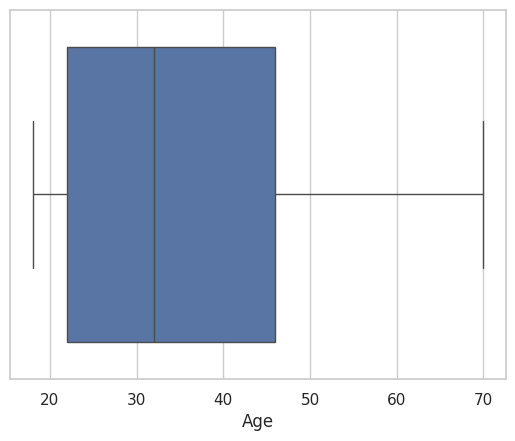

In [28]:
import seaborn as sns
sns.boxplot(x=data['Age'])
plt.show()

(array([100298.,  37507.,  12322.,  30130.,  12529.,  44206.,  12244.,
         15361.,  12514.,  14970.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

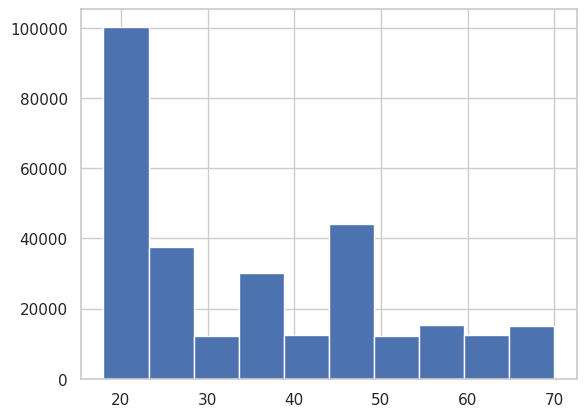

In [29]:
plt.hist(data['Age'])

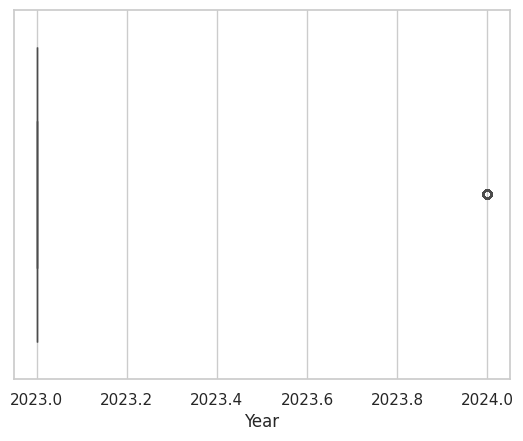

In [30]:
sns.boxplot(x=data['Year'])
plt.show()

(array([243856.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
         48225.]),
 array([2023.  , 2023.02, 2023.04, 2023.06, 2023.08, 2023.1 , 2023.12,
        2023.14, 2023.16, 2023.18, 2023.2 , 2023.22, 2023.24, 2023.26,
        2023.28, 2023.3 , 2023.32, 2023.34, 2023.36, 2023.38, 2023.4 ,
        2023.42, 2023.44, 2023.46, 2023.48, 2023.5 , 2023.52, 2023.54,
        2023.56, 2023.58, 2023.6 , 2023.62, 2023.64, 2023.66, 2023.68,
        2023.7 , 2023.72, 2023.74, 2023.76, 2023.78, 2023.8 , 2023.82,
        2023.84, 2023.86, 2023.88, 2023.9 , 2023.92, 2023.

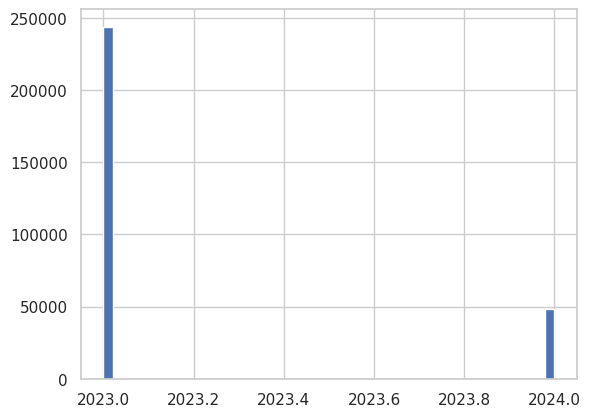

In [31]:
plt.hist(data['Year'], bins=50)

The 'Year' Column seems to have **outliers**

In [32]:
for column in data.select_dtypes(include=['object']):
    if column in ['Name', 'Email','Address','products','unique_customer_key','unique_transaction_key','Phone','Zipcode']:
        continue

    unique_values = data[column].unique()
    print(f"Unique upper values in '{column}': {len(unique_values)}")
    unique_values = data[column].str.lower().unique()
    print(f"Unique lower values in '{column}': {len(unique_values)}")

Unique upper values in 'City': 130
Unique lower values in 'City': 130
Unique upper values in 'State': 54
Unique lower values in 'State': 54
Unique upper values in 'Country': 5
Unique lower values in 'Country': 5
Unique upper values in 'Gender': 2
Unique lower values in 'Gender': 2
Unique upper values in 'Income': 3
Unique lower values in 'Income': 3
Unique upper values in 'Customer_Segment': 3
Unique lower values in 'Customer_Segment': 3
Unique upper values in 'Product_Category': 5
Unique lower values in 'Product_Category': 5
Unique upper values in 'Product_Brand': 18
Unique lower values in 'Product_Brand': 18
Unique upper values in 'Product_Type': 33
Unique lower values in 'Product_Type': 33
Unique upper values in 'Feedback': 4
Unique lower values in 'Feedback': 4
Unique upper values in 'Shipping_Method': 3
Unique lower values in 'Shipping_Method': 3
Unique upper values in 'Payment_Method': 4
Unique lower values in 'Payment_Method': 4
Unique upper values in 'Order_Status': 4
Unique lo

In [33]:
# Get summary statistics for the data
data[['Age','Amount','Ratings','Datetime']].describe().round(3)

,Age,Amount,Ratings,Datetime
count,292081.000,292081.000,292081.000,292081
mean,35.407,255.182,3.165,2023-08-31 04:02:32.176529920
min,18.000,10.000,1.000,2023-03-01 00:02:39
25%,22.000,132.880,2.000,2023-05-31 19:59:27
50%,32.000,255.478,3.000,2023-08-31 05:06:05
75%,46.000,377.697,4.000,2023-11-30 16:23:17
max,70.000,499.998,5.000,2024-02-29 23:58:43
std,14.999,141.387,1.320,NaN


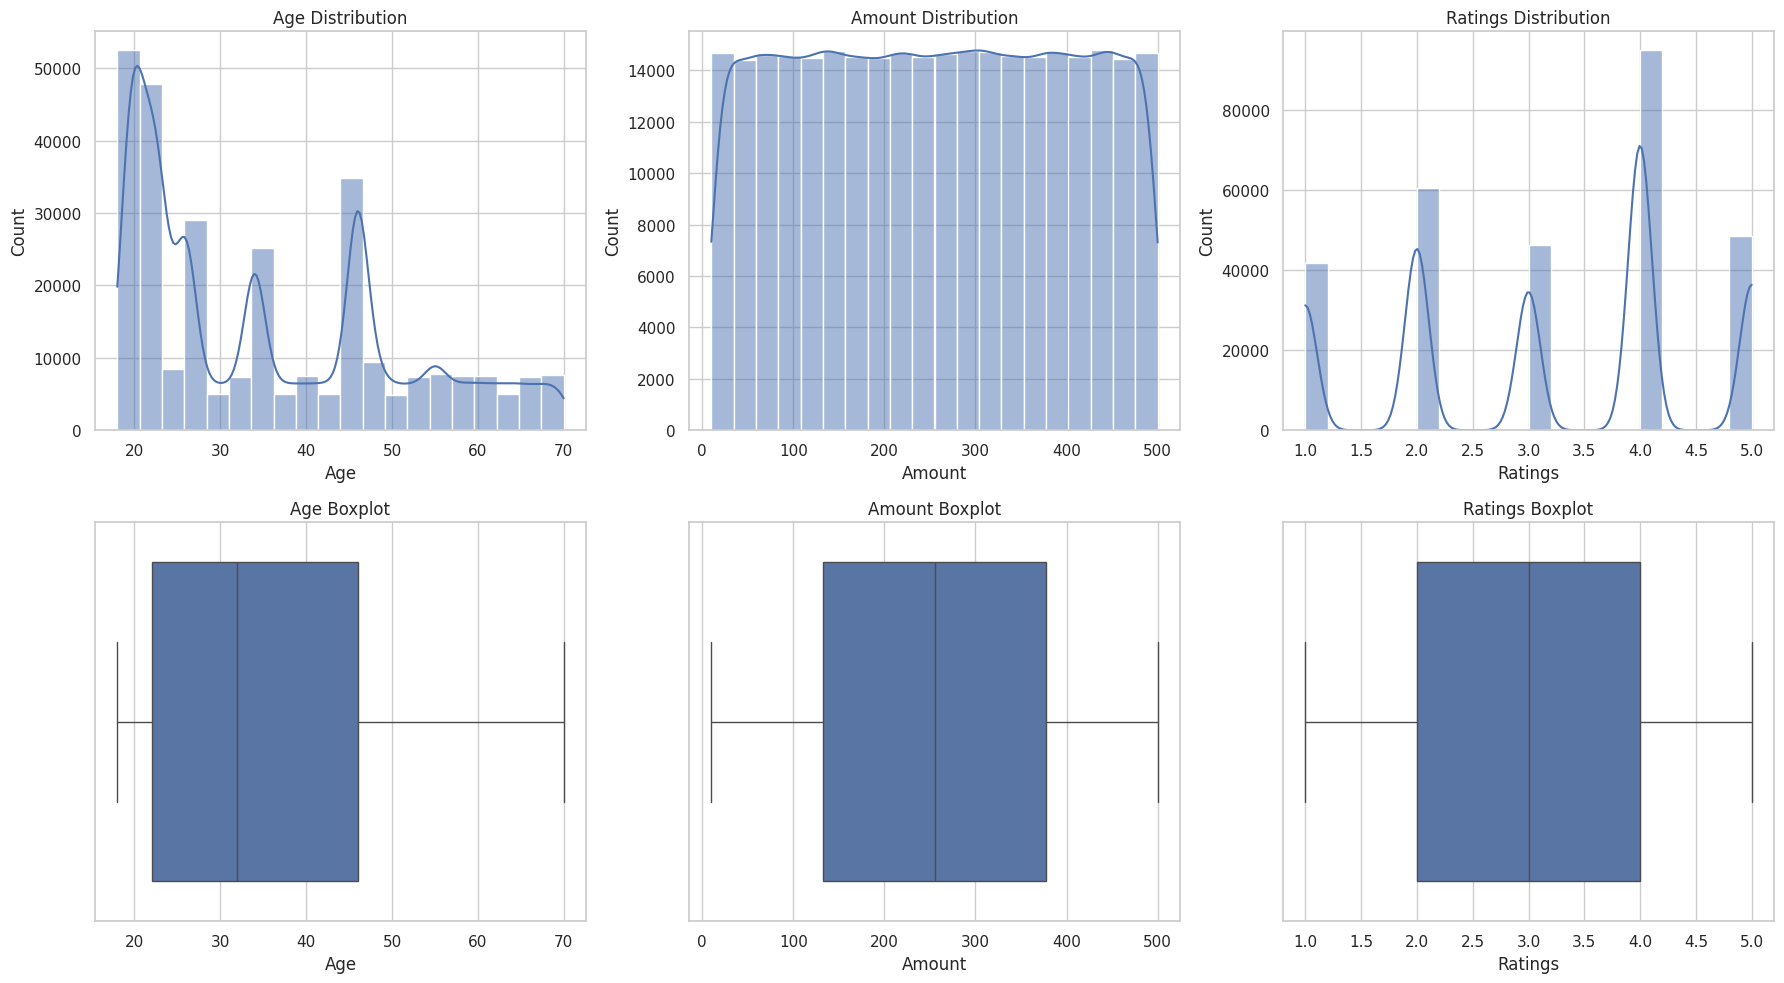

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Distribution plots
sns.histplot(data['Age'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

sns.histplot(data['Amount'], bins=20, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Amount Distribution')

sns.histplot(data['Ratings'], bins=20, kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Ratings Distribution')

# Boxplots
sns.boxplot(x=data['Age'], ax=axs[1, 0])
axs[1, 0].set_title('Age Boxplot')

sns.boxplot(x=data['Amount'], ax=axs[1, 1])
axs[1, 1].set_title('Amount Boxplot')

sns.boxplot(x=data['Ratings'], ax=axs[1, 2])
axs[1, 2].set_title('Ratings Boxplot')

# Adjust layout
plt.tight_layout()
plt.show()

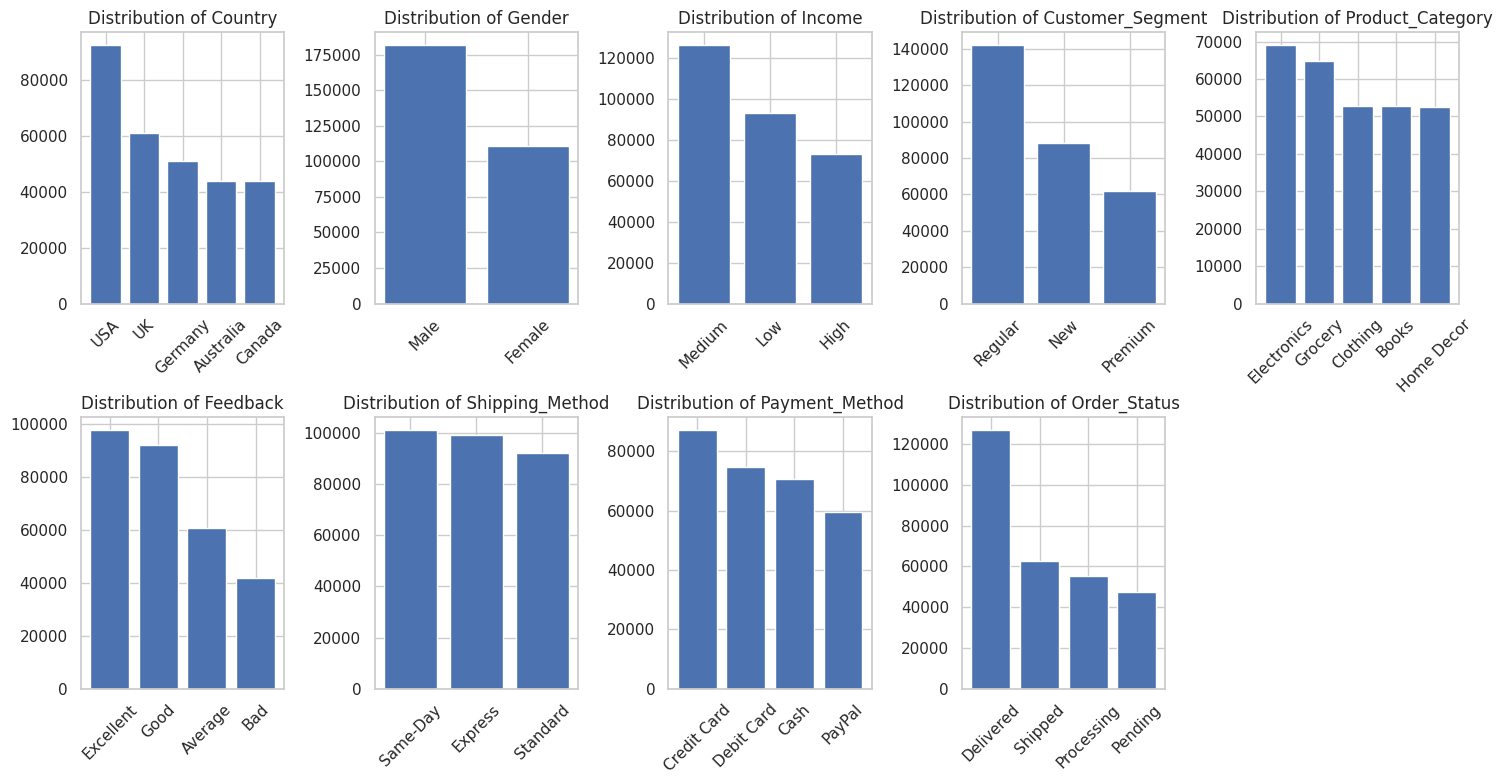

In [35]:
# Select categorical columns
categorical_columns = ['Country', 'Gender', 'Income', 'Customer_Segment',
                       'Product_Category', 'Feedback', 'Shipping_Method',
                       'Payment_Method', 'Order_Status']

# Set the size of the plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, (len(categorical_columns) + 1) // 2, i)  # Create subplots
    value_counts = data[col].value_counts()  # Get value counts for each column
    plt.bar(value_counts.index, value_counts.values)  # Create bar plot
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [36]:
# Calculate total revenue for each order status
total_revenue_delivered = data[data['Order_Status'] == 'Delivered']['Amount'].sum()
total_revenue_shipped = data[data['Order_Status'] == 'Shipped']['Amount'].sum()
total_revenue_processing = data[data['Order_Status'] == 'Processing']['Amount'].sum()
total_revenue_pending = data[data['Order_Status'] == 'Pending']['Amount'].sum()

# Calculate the total revenue from not completed orders
total_revenue_not_completed = total_revenue_shipped + total_revenue_processing + total_revenue_pending

# Calculate the difference
revenue_difference = total_revenue_not_completed - total_revenue_delivered

# Convert to millions and format as currency
total_revenue_delivered_millions = total_revenue_delivered / 1_000_000
total_revenue_not_completed_millions = total_revenue_not_completed / 1_000_000
revenue_difference_millions = revenue_difference / 1_000_000

# Print the results in millions or currency format
print(f"Total Revenue from Completed Orders: ${total_revenue_delivered_millions:.2f} million")
print(f"Total Revenue from Not Completed Orders: ${total_revenue_not_completed_millions:.2f} million")
print(f"Revenue Difference (Not Completed - Completed): ${revenue_difference_millions:.2f} million")

# Identify which order statuses lost money
order_status_revenues = {
    'Shipped': total_revenue_shipped,
    'Processing': total_revenue_processing,
    'Pending': total_revenue_pending
}

# Check for losses compared to completed orders
losses = {status: revenue for status, revenue in order_status_revenues.items() if revenue < total_revenue_delivered}


if losses:
    print("\nOrder statuses that lost money compared to completed orders:")
    for status, revenue in losses.items():
        revenue_millions = revenue / 1_000_000
        print(f"{status}: ${revenue_millions:.2f} million")
else:
    print("\nNo order statuses lost money compared to completed orders.")

Total Revenue from Completed Orders: $32.30 million
Total Revenue from Not Completed Orders: $42.23 million
Revenue Difference (Not Completed - Completed): $9.93 million

Order statuses that lost money compared to completed orders:
Shipped: $16.07 million
Processing: $14.06 million
Pending: $12.09 million


In [37]:
completed_orders = data[data['Order_Status'] == 'Delivered']
not_completed_orders = data[data['Order_Status'] != 'Delivered']

# Group by 'new_customer_id' to calculate total spent for completed and not completed orders
customer_totals_completed_orders = completed_orders.groupby('new_customer_id').agg(
    completed_amount=('Amount', 'sum')  # Sum of Amount for completed transactions
).reset_index()

customer_totals_not_completed_orders = not_completed_orders.groupby('new_customer_id').agg(
    not_completed_amount=('Amount', 'sum')  # Sum of Amount for not completed transactions
).reset_index()

# Merge the two DataFrames on 'new_customer_id'
customer_orders = pd.merge(customer_totals_completed_orders,
                           customer_totals_not_completed_orders,
                           on='new_customer_id',
                           how='outer')

# Fill missing values with 0
customer_orders.fillna(0, inplace=True)

# Perform T-test
t_statistic, p_value = ttest_ind(
    customer_orders['completed_amount'],
    customer_orders['not_completed_amount'],
    equal_var=False  # Set to False if the variances are not assumed to be equal
)

# Print T-test results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("The difference in average amount spent between completed and not completed orders is statistically significant.")
else:
    print("There is no significant difference in average amount spent between completed and not completed orders.")

T-statistic: -72.85863132645089
P-value: 0.0
The difference in average amount spent between completed and not completed orders is statistically significant.


In [38]:
shipped_orders = data[data['Order_Status'] == 'Shipped']
processing_orders = data[data['Order_Status'] == 'Processing']
pending_orders = data[data['Order_Status'] == 'Pending']
delivered_orders = data[data['Order_Status'] == 'Delivered']

# Group by 'new_customer_id' to calculate total amount for each status
customer_totals_shipped = shipped_orders.groupby('new_customer_id').agg(
    shipped_amount=('Amount', 'sum')  # Sum of Amount for shipped transactions
).reset_index()

customer_totals_processing = processing_orders.groupby('new_customer_id').agg(
    processing_amount=('Amount', 'sum')  # Sum of Amount for processing transactions
).reset_index()

customer_totals_pending = pending_orders.groupby('new_customer_id').agg(
    pending_amount=('Amount', 'sum')  # Sum of Amount for pending transactions
).reset_index()

customer_totals_delivered = delivered_orders.groupby('new_customer_id').agg(
    delivered_amount=('Amount', 'sum')  # Sum of Amount for delivered transactions
).reset_index()

# Merge the four DataFrames on 'new_customer_id'
customer_orders = pd.merge(customer_totals_shipped, customer_totals_processing, on='new_customer_id', how='outer')
customer_orders = pd.merge(customer_orders, customer_totals_pending, on='new_customer_id', how='outer')
customer_orders = pd.merge(customer_orders, customer_totals_delivered, on='new_customer_id', how='outer').set_index('new_customer_id')

# Fill missing values with 0
customer_orders.fillna(0, inplace=True)

# Perform ANOVA
f_statistic, p_value = f_oneway(
    customer_orders['shipped_amount'],
    customer_orders['processing_amount'],
    customer_orders['pending_amount'],
    customer_orders['delivered_amount']
)

# Print ANOVA results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There are significant differences in the amounts spent across different order statuses.")
else:
    print("There are no significant differences in the amounts spent across different order statuses.")


F-statistic: 16152.045600508161
P-value: 0.0
There are significant differences in the amounts spent across different order statuses.


In [39]:
# Perform Tukey's HSD Test for pairwise comparison
melted_data = customer_orders.reset_index().melt(id_vars='new_customer_id',
                                                  value_vars=['shipped_amount', 'processing_amount', 'pending_amount','delivered_amount'],
                                                  var_name='Order_Status', value_name='Amount_Spent')

tukey_result = pairwise_tukeyhsd(endog=melted_data['Amount_Spent'], groups=melted_data['Order_Status'], alpha=0.05)

# Print Tukey's results
print(tukey_result)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj  lower    upper   reject
---------------------------------------------------------------------------
 delivered_amount    pending_amount -81.2548   0.0 -82.3188 -80.1908   True
 delivered_amount processing_amount -73.3339   0.0 -74.3979   -72.27   True
 delivered_amount    shipped_amount -65.2621   0.0 -66.3261 -64.1981   True
   pending_amount processing_amount   7.9209   0.0   6.8569   8.9848   True
   pending_amount    shipped_amount  15.9927   0.0  14.9287  17.0567   True
processing_amount    shipped_amount   8.0718   0.0   7.0078   9.1358   True
---------------------------------------------------------------------------


In [40]:
# Create a contingency table for Shipping_Method and Order_Status
contingency_table = pd.crosstab(data['Shipping_Method'], data['Order_Status'])
print(contingency_table)

# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)

# Interpret the result
if p_val < 0.05:
    print("There is a significant association between Shipping_Method and Order_Status (Reject Null Hypothesis).")
else:
    print("There is no significant association between Shipping_Method and Order_Status (Fail to Reject Null Hypothesis).")

Order_Status     Delivered  Pending  Processing  Shipped
Shipping_Method                                         
Express              42932    16115       18758    21175
Same-Day             44973    16001       18674    21281
Standard             38864    15173       17775    20360
Chi-square Statistic: 114.69710770486155
P-value: 2.1134756986685152e-22
Degrees of Freedom: 6
There is a significant association between Shipping_Method and Order_Status (Reject Null Hypothesis).


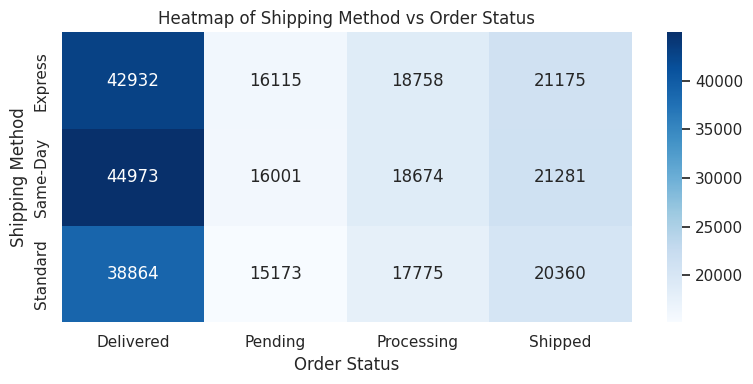

In [41]:
# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")

plt.title('Heatmap of Shipping Method vs Order Status')
plt.xlabel('Order Status')
plt.ylabel('Shipping Method')
plt.tight_layout()
plt.show()

In [42]:
# Create a contingency table for Shipping_Method and Order_Status
contingency_table = pd.crosstab(data['Payment_Method'], data['Order_Status'])

# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)

# Interpret the result
if p_val < 0.05:
    print("There is a significant association between Payment_Method and Order_Status (Reject Null Hypothesis).")
else:
    print("There is no significant association between Payment_Method and Order_Status (Fail to Reject Null Hypothesis).")

Chi-square Statistic: 325.81738882103247
P-value: 8.6136422234972e-65
Degrees of Freedom: 9
There is a significant association between Payment_Method and Order_Status (Reject Null Hypothesis).


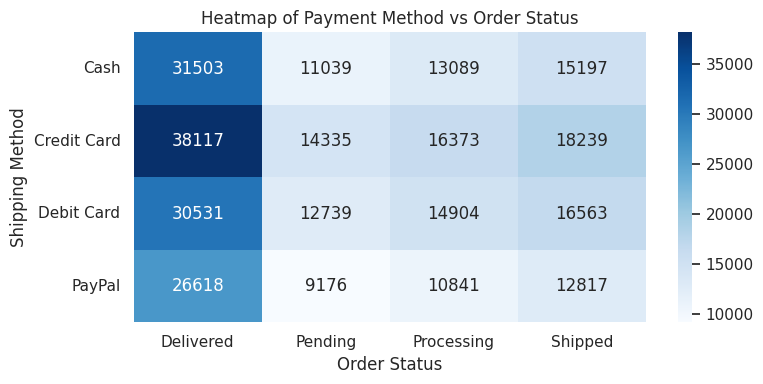

In [43]:
plt.figure(figsize=(8, 4))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")

plt.title('Heatmap of Payment Method vs Order Status')
plt.xlabel('Order Status')
plt.ylabel('Shipping Method')
plt.tight_layout()
plt.show()

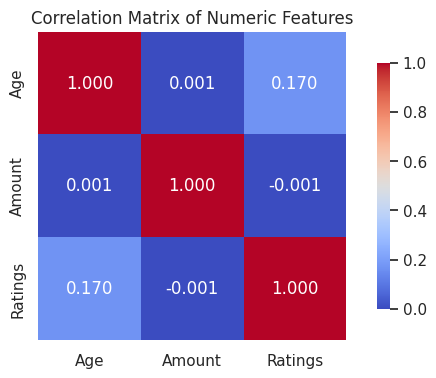

In [44]:
# Calculate the correlation matrix
# Select numeric features excluding ID columns
numeric_features_excluded_ids = data.select_dtypes(include=['int64',
                                                            'float64']).columns.difference(['new_customer_id',
                                                                                            'new_transaction_id'])

correlation_matrix = data[numeric_features_excluded_ids].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [45]:
# Exclude 'datetime' and other non-relevant columns
columns = data.columns.difference(['Name', 'Email', 'Phone', 'Address', 'Zipcode',
                                   'Order_Status', 'products', 'new_customer_id',
                                   'new_transaction_id', 'Datetime', 'Product_Brand'])

# Separate features (X) and target (y)
X = data[columns]
y = data['Order_Status']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize features before logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Logistic regression model (specifying multi_class='multinomial')
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_scaled, y)

# Create a DataFrame for coefficients for each target class
coefficients = pd.DataFrame(log_reg.coef_, columns=X_encoded.columns)
target_classes = log_reg.classes_
coefficients.set_index(target_classes,inplace = True)


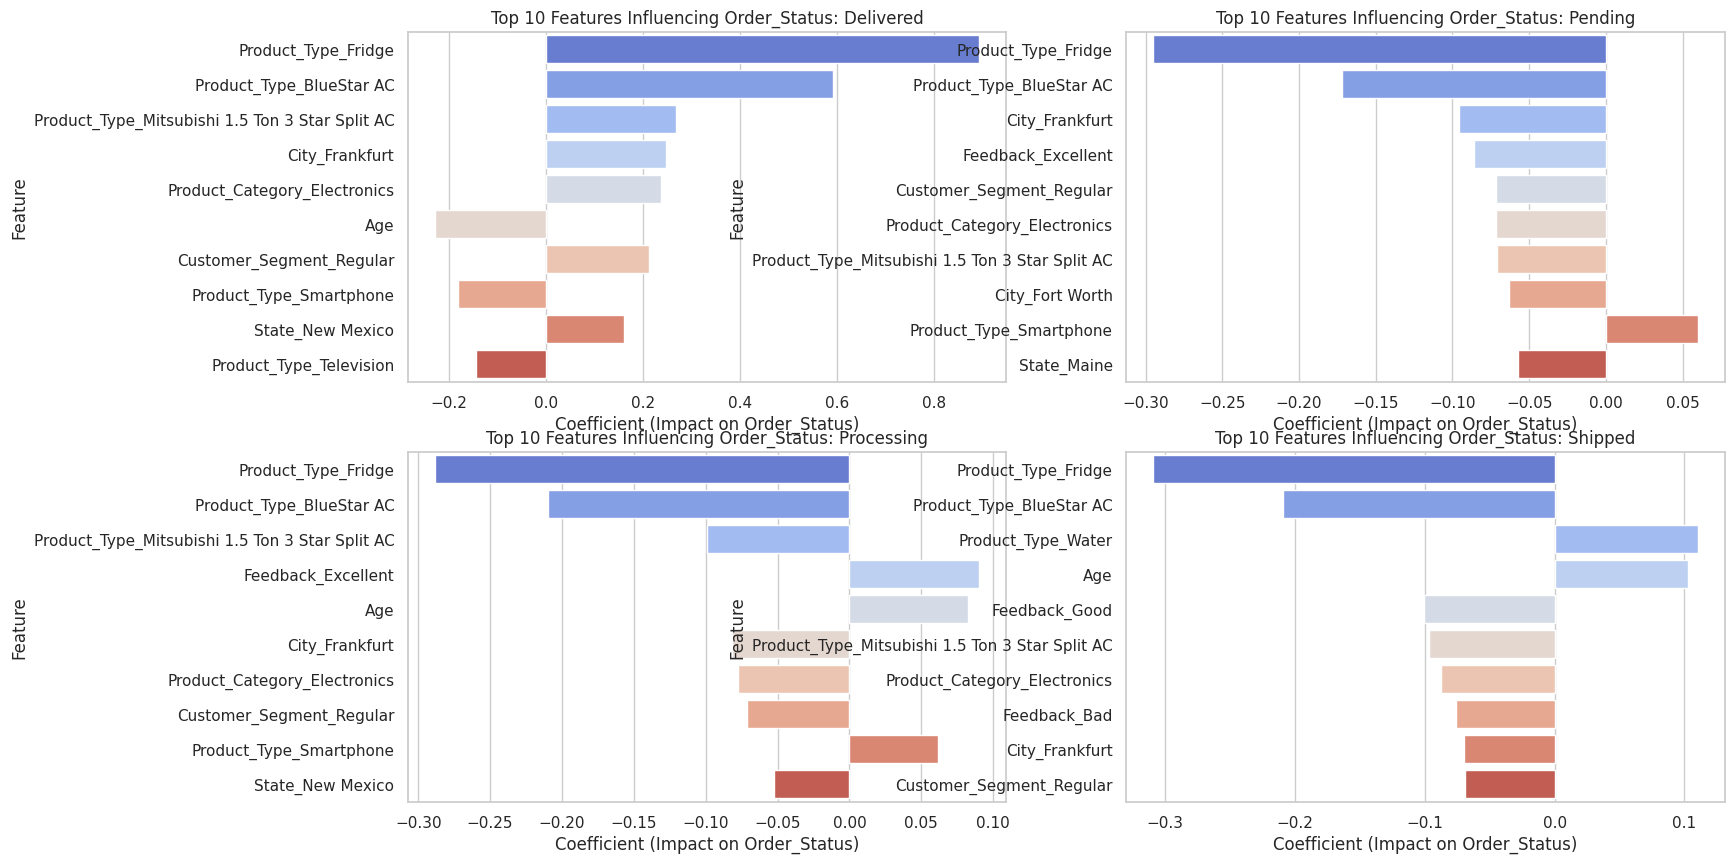

In [46]:
# Plot coefficients for each target class
plt.figure(figsize=(17, 10))

for i, target in enumerate(target_classes):
    plt.subplot(2, 2, i + 1)  # Create a subplot for each target

    # Get the coefficients for the current target
    coef_with_features = coefficients.iloc[i].reset_index()
    coef_with_features.columns = ['Feature', 'Coefficient']

    # Calculate absolute coefficients for sorting
    coef_with_features['Abs_Coefficient'] = coef_with_features['Coefficient'].abs()

    # Sort by absolute value and get the top 10
    top_features = coef_with_features.sort_values('Abs_Coefficient', ascending=False).head(10)

    # Plot the coefficients
    sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')

    # Add labels and title
    plt.title(f'Top 10 Features Influencing Order_Status: {target}')
    plt.xlabel('Coefficient (Impact on Order_Status)')
    plt.ylabel('Feature')


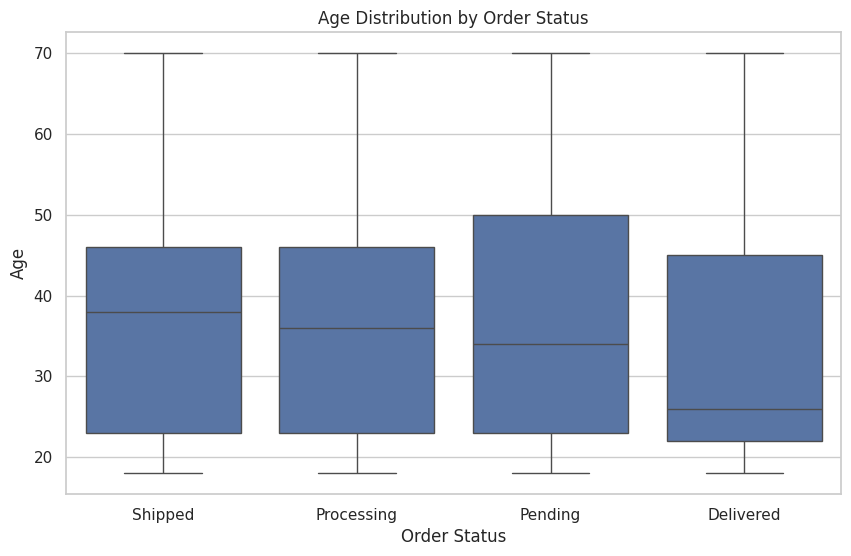

In [47]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Order_Status', y='Age')

# Add title and labels
plt.title('Age Distribution by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Age')

# Show the plot
plt.show()

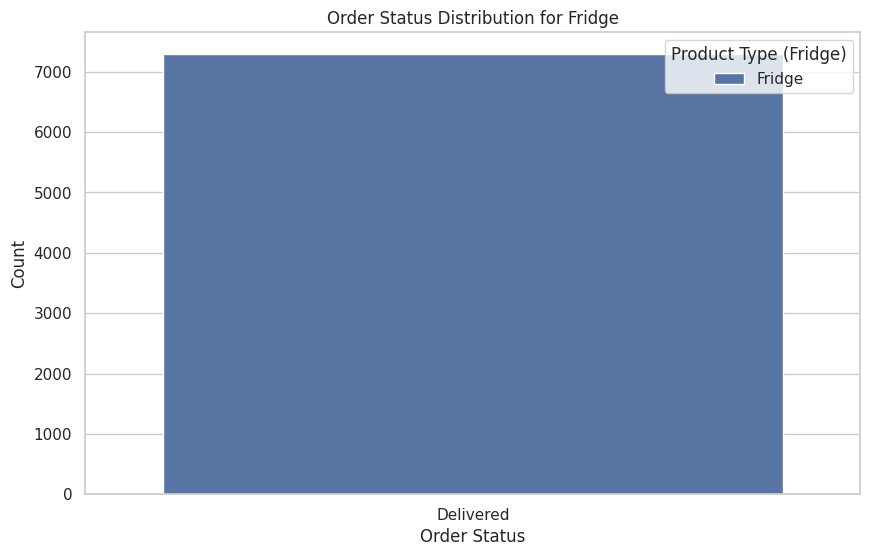

In [48]:
# Filter the dataset
data_filtered = data[data['Product_Type'] == 'Fridge']

# Count plot of Order_Status based on Product_Type_Fridge
plt.figure(figsize=(10, 6))
sns.countplot(data=data_filtered, x='Order_Status', hue='Product_Type')
plt.title('Order Status Distribution for Fridge')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.legend(title='Product Type (Fridge)')
plt.show()

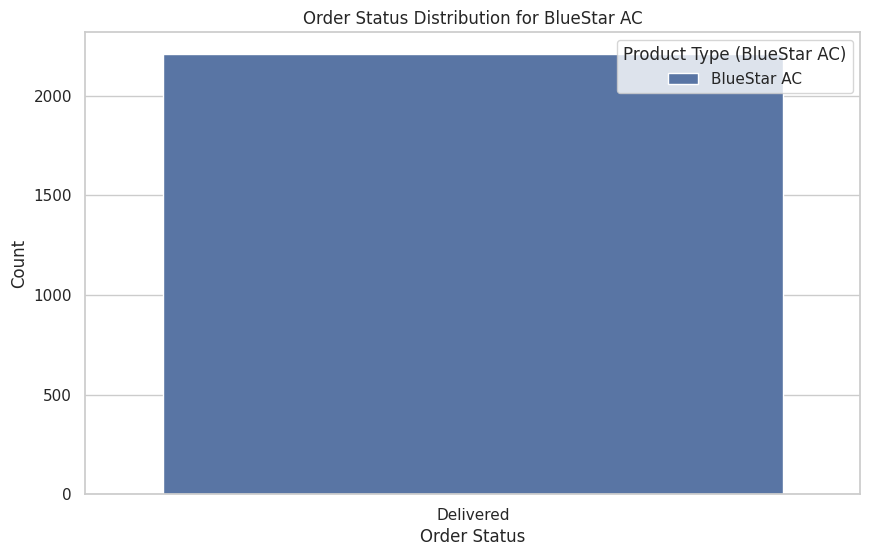

In [49]:
# Filter the dataset
data_filtered = data[data['Product_Type'] == 'BlueStar AC']

# Count plot of Order_Status based on Product_Type_BlueStar AC
plt.figure(figsize=(10, 6))
sns.countplot(data=data_filtered, x='Order_Status', hue='Product_Type')
plt.title('Order Status Distribution for BlueStar AC')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.legend(title='Product Type (BlueStar AC)')
plt.show()

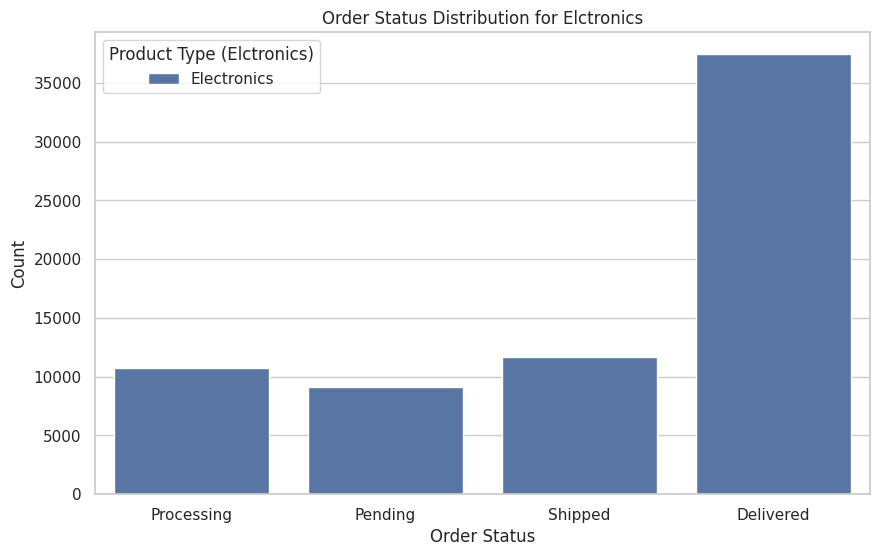

In [50]:
data_filtered = data[data['Product_Category'] == 'Electronics']

# Count plot of Order_Status based on Product_Category_Electronics
plt.figure(figsize=(10, 6))
sns.countplot(data=data_filtered, x='Order_Status', hue='Product_Category')
plt.title('Order Status Distribution for Elctronics')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.legend(title='Product Type (Elctronics)')
plt.show()

In [51]:
# Filter for delivered orders
delivered_orders = data[data['Order_Status'] == 'Delivered']

# Define age groups
bins = [18, 25, 35, 45, 100]  # Define the age bins
labels = ['18-25', '25-35', '35-45', '46+']  # Define the labels for the groups

# Create a new column for age groups
delivered_orders['Age_Group'] = pd.cut(delivered_orders['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and calculate total amount and total purchases
age_group_summary = delivered_orders.groupby('Age_Group').agg(
    Total_Amount_Millions=('Amount', 'sum'),
    Total_Purchases_K=('Age_Group', 'count')
).reset_index()

# Convert amount to millions and total purchases to thousands
age_group_summary['Total_Amount_Millions'] = age_group_summary['Total_Amount_Millions'] / 1_000_000
age_group_summary['Total_Purchases_K'] = age_group_summary['Total_Purchases_K'] / 1_000

# Display the summary
age_group_summary = age_group_summary.sort_values(by='Total_Amount_Millions', ascending=False)
age_group_summary

,Age_Group,Total_Amount_Millions,Total_Purchases_K
0,18-25,13.885038,54.442
1,25-35,8.300571,32.657
3,46+,8.141918,31.929
2,35-45,1.976620,7.741


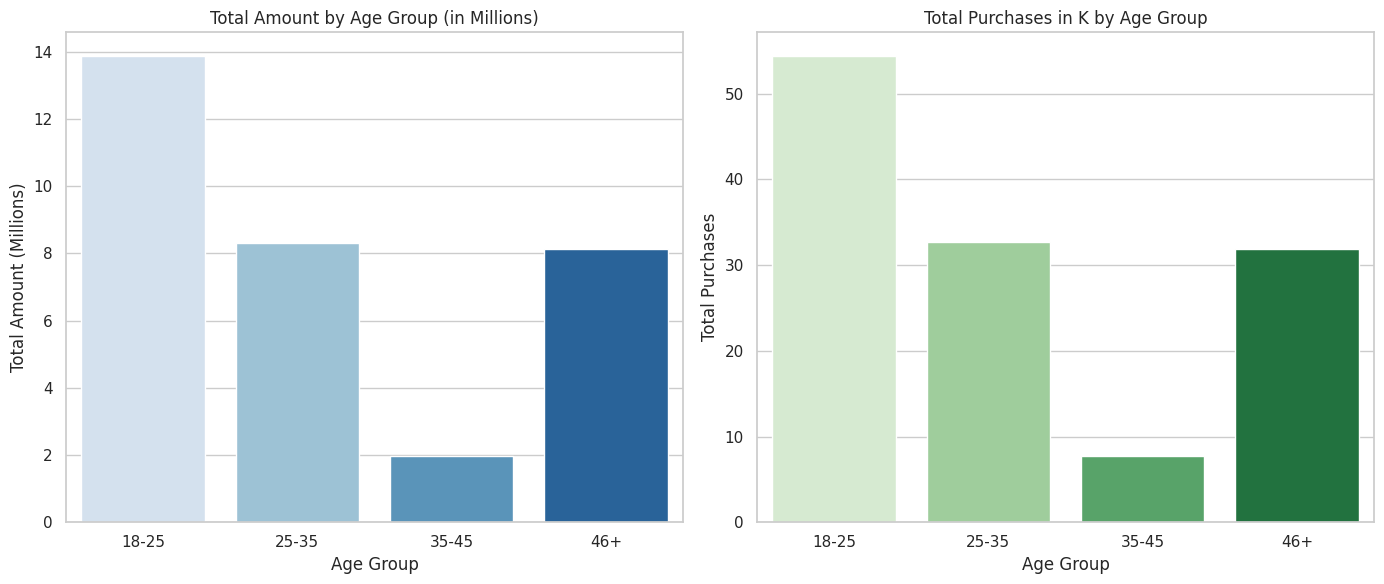

In [52]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a figure with two subplots
fig, ax1 = plt.subplots(1, 2, figsize=(14, 6))

# Plot Total Amount
sns.barplot(data=age_group_summary, x='Age_Group', y='Total_Amount_Millions', ax=ax1[0], palette='Blues')
ax1[0].set_title('Total Amount by Age Group (in Millions)')
ax1[0].set_xlabel('Age Group')
ax1[0].set_ylabel('Total Amount (Millions)')

# Plot Total Purchases
sns.barplot(data=age_group_summary, x='Age_Group', y='Total_Purchases_K', ax=ax1[1], palette='Greens')
ax1[1].set_title('Total Purchases in K by Age Group')
ax1[1].set_xlabel('Age Group')
ax1[1].set_ylabel('Total Purchases')

# Show the plots
plt.tight_layout()
plt.show()

In [53]:
# Group by City and calculate total amount and total purchases for delivered orders
city_summary = delivered_orders.groupby('City').agg(
    Total_Amount_Millions=('Amount', 'sum'),
    Total_Purchases_K=('City', 'count')
).reset_index()

# Convert the amount to millions and purchases to thousands
city_summary['Total_Amount_Millions'] = city_summary['Total_Amount_Millions'] / 1000000
city_summary['Total_Purchases_K'] = city_summary['Total_Purchases_K'] / 1000

# Sort city summary data by Total_Amount_Millions for better visualization
city_summary_sorted = city_summary.sort_values(by='Total_Amount_Millions', ascending=False).head(10)
city_summary_sorted

,City,Total_Amount_Millions,Total_Purchases_K
100,Portsmouth,2.929678,11.516
107,San Francisco,2.503368,9.807
44,Frankfurt,2.191669,8.609
26,Chicago,1.356801,5.358
43,Fort Worth,1.148822,4.540
16,Boston,0.593256,2.328
67,London,0.418267,1.686
84,New York,0.372657,1.456
32,Darwin,0.243578,0.942
122,Victoria,0.238930,0.940


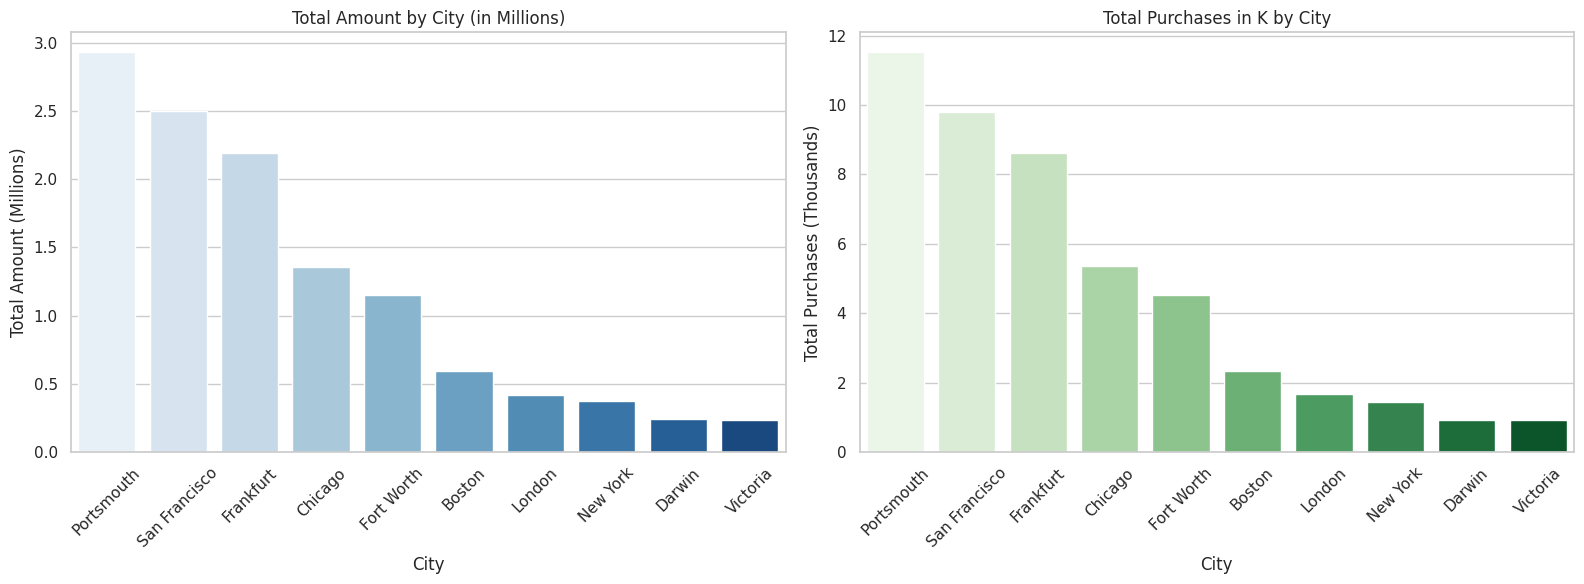

In [54]:
# Create a figure with two subplots for Total Amount and Total Purchases by City
fig, ax1 = plt.subplots(1, 2, figsize=(16, 6))

# Plot Total Amount by City
sns.barplot(data=city_summary_sorted, x='City', y='Total_Amount_Millions', ax=ax1[0], palette='Blues')
ax1[0].set_title('Total Amount by City (in Millions)')
ax1[0].set_xlabel('City')
ax1[0].set_ylabel('Total Amount (Millions)')
ax1[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Plot Total Purchases by City
sns.barplot(data=city_summary_sorted, x='City', y='Total_Purchases_K', ax=ax1[1], palette='Greens')
ax1[1].set_title('Total Purchases in K by City')
ax1[1].set_xlabel('City')
ax1[1].set_ylabel('Total Purchases (Thousands)')
ax1[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [55]:
# Group by State and calculate total amount and total purchases for delivered orders
state_summary = delivered_orders.groupby('State').agg(
    Total_Amount_Millions=('Amount', 'sum'),
    Total_Purchases_K=('State', 'count')
).reset_index()

# Convert the amount to millions and purchases to thousands
state_summary['Total_Amount_Millions'] = state_summary['Total_Amount_Millions'] / 1000000
state_summary['Total_Purchases_K'] = state_summary['Total_Purchases_K'] / 1000

# Sort state summary data by Total_Amount_Millions for better visualization
state_summary_sorted = state_summary.sort_values(by='Total_Amount_Millions', ascending=False).head(10)

# Display the sorted state summary
state_summary_sorted

,State,Total_Amount_Millions,Total_Purchases_K
9,England,7.126354,27.972
4,Berlin,6.367549,24.979
33,New South Wales,4.455755,17.384
39,Ontario,4.414292,17.422
20,Maine,2.508666,9.831
7,Connecticut,1.368825,5.385
32,New Mexico,1.160652,4.565
11,Georgia,0.586149,2.337
17,Kansas,0.385991,1.505
34,New York,0.099645,0.392


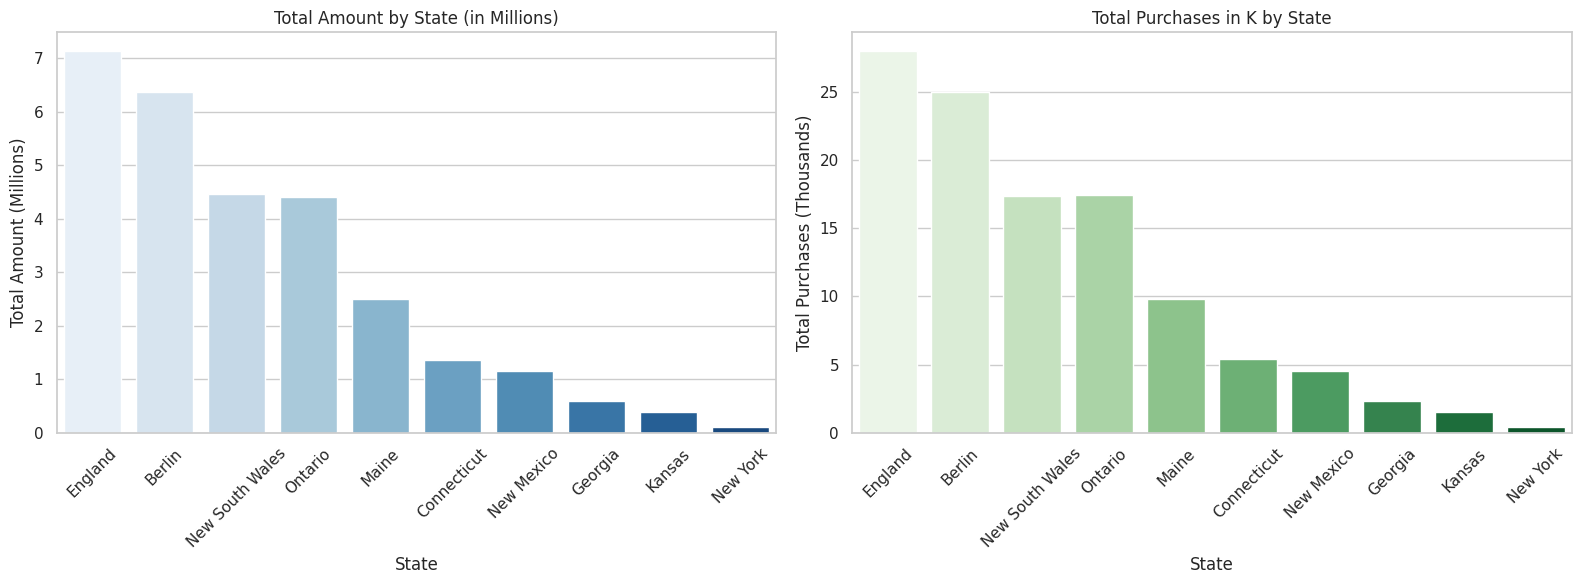

In [56]:
# Create a figure with two subplots for Total Amount and Total Purchases by State
fig, ax1 = plt.subplots(1, 2, figsize=(16, 6))

# Plot Total Amount by State
sns.barplot(data=state_summary_sorted, x='State', y='Total_Amount_Millions', ax=ax1[0], palette='Blues')
ax1[0].set_title('Total Amount by State (in Millions)')
ax1[0].set_xlabel('State')
ax1[0].set_ylabel('Total Amount (Millions)')
ax1[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Plot Total Purchases by State
sns.barplot(data=state_summary_sorted, x='State', y='Total_Purchases_K', ax=ax1[1], palette='Greens')
ax1[1].set_title('Total Purchases in K by State')
ax1[1].set_xlabel('State')
ax1[1].set_ylabel('Total Purchases (Thousands)')
ax1[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [57]:
# Group by Country and calculate total amount and total purchases for delivered orders
country_summary = delivered_orders.groupby('Country').agg(
    Total_Amount_Millions=('Amount', 'sum'),
    Total_Purchases_K=('Country', 'count')
).reset_index()

# Convert the amount to millions and purchases to thousands
country_summary['Total_Amount_Millions'] = country_summary['Total_Amount_Millions'] / 1000000
country_summary['Total_Purchases_K'] = country_summary['Total_Purchases_K'] / 1000

# Sort country summary data by Total_Amount_Millions for better visualization
country_summary_sorted = country_summary.sort_values(by='Total_Amount_Millions', ascending=False)
country_summary_sorted

,Country,Total_Amount_Millions,Total_Purchases_K
4,USA,9.940197,39.012
3,UK,7.126354,27.972
2,Germany,6.367549,24.979
0,Australia,4.455755,17.384
1,Canada,4.414292,17.422


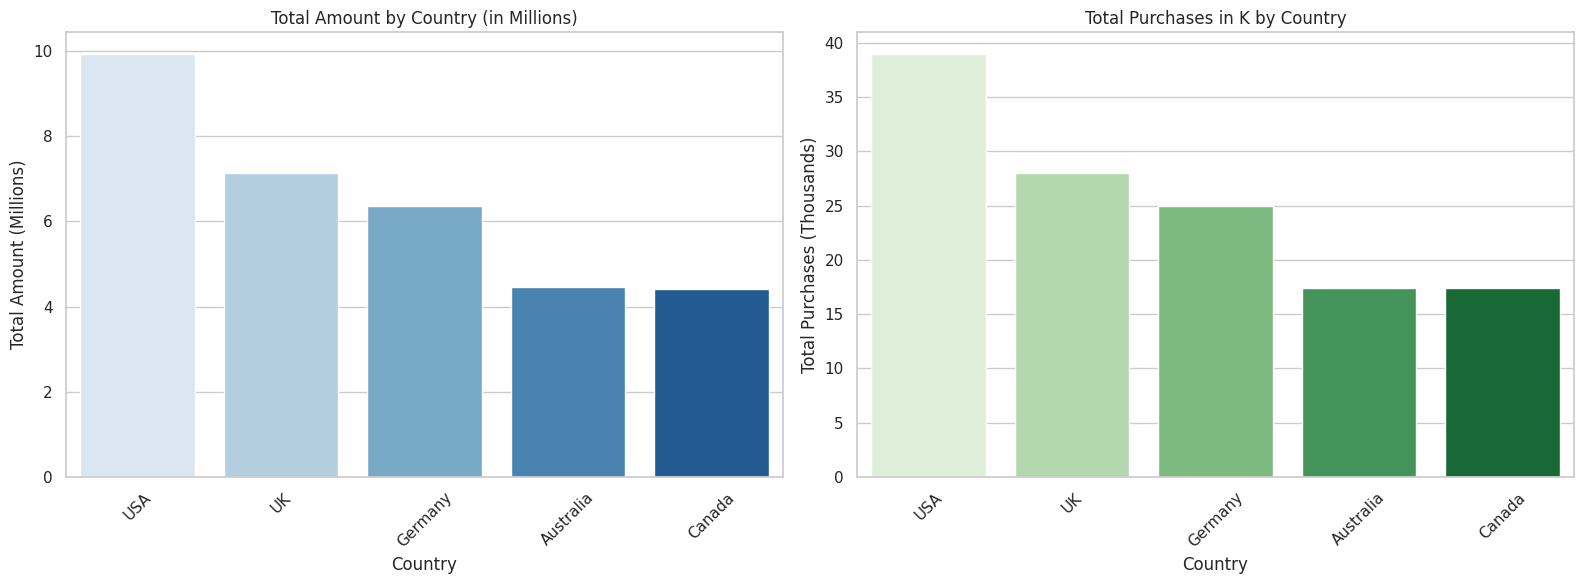

In [58]:
# Create a figure with two subplots for Total Amount and Total Purchases by Country
fig, ax1 = plt.subplots(1, 2, figsize=(16, 6))

# Plot Total Amount by Country
sns.barplot(data=country_summary_sorted, x='Country', y='Total_Amount_Millions', ax=ax1[0], palette='Blues')
ax1[0].set_title('Total Amount by Country (in Millions)')
ax1[0].set_xlabel('Country')
ax1[0].set_ylabel('Total Amount (Millions)')
ax1[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Plot Total Purchases by Country
sns.barplot(data=country_summary_sorted, x='Country', y='Total_Purchases_K', ax=ax1[1], palette='Greens')
ax1[1].set_title('Total Purchases in K by Country')
ax1[1].set_xlabel('Country')
ax1[1].set_ylabel('Total Purchases (Thousands)')
ax1[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [59]:
# Create the treemap
fig = px.treemap(
    data,
    path=['Country', 'State', 'City'],
    values='Amount',
    title='Sales Amount Treemap'
)

# Show the figure
fig

In [60]:
# Group by Income and calculate total amount and total purchases for delivered orders
income_summary = delivered_orders.groupby('Income').agg(
    Total_Amount_Millions=('Amount', 'sum'),
    Total_Purchases_K=('Income', 'count')
).reset_index()

# Convert the amount to millions and purchases to thousands
income_summary['Total_Amount_Millions'] = income_summary['Total_Amount_Millions'] / 1000000
income_summary['Total_Purchases_K'] = income_summary['Total_Purchases_K'] / 1000

# Sort income summary data by Total_Amount_Millions for better visualization
income_summary_sorted = income_summary.sort_values(by='Total_Amount_Millions', ascending=False)
income_summary_sorted

,Income,Total_Amount_Millions,Total_Purchases_K
2,Medium,14.322824,56.347
1,Low,9.219838,36.050
0,High,8.761485,34.372


In [62]:
current_date = delivered_orders['Datetime'].max()  # Get the most recent order date

# RFM calculation
rfm = delivered_orders.groupby('new_customer_id').agg(
    Recency=('Datetime', lambda x: (current_date - x.max()).days),
    Frequency=('new_transaction_id', 'count'),  # Assuming Order_ID is unique for each order
    Monetary=('Amount', 'sum')
).reset_index()

rfm.head()

,new_customer_id,Recency,Frequency,Monetary
0,3,48,1,431.869395
1,8,54,1,328.839302
2,9,148,2,860.733739
3,12,58,1,161.879361
4,13,298,1,350.817016


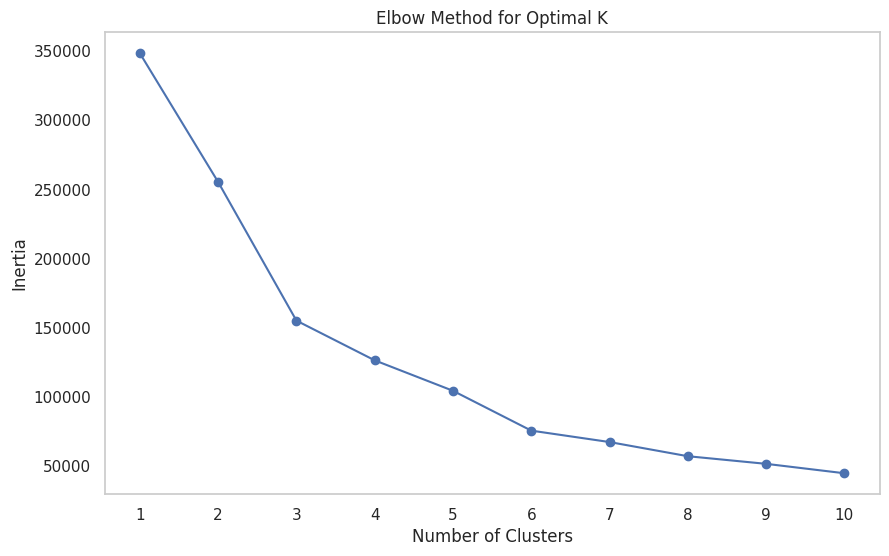

In [63]:
# Normalize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)  # Check for 1 to 10 clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()


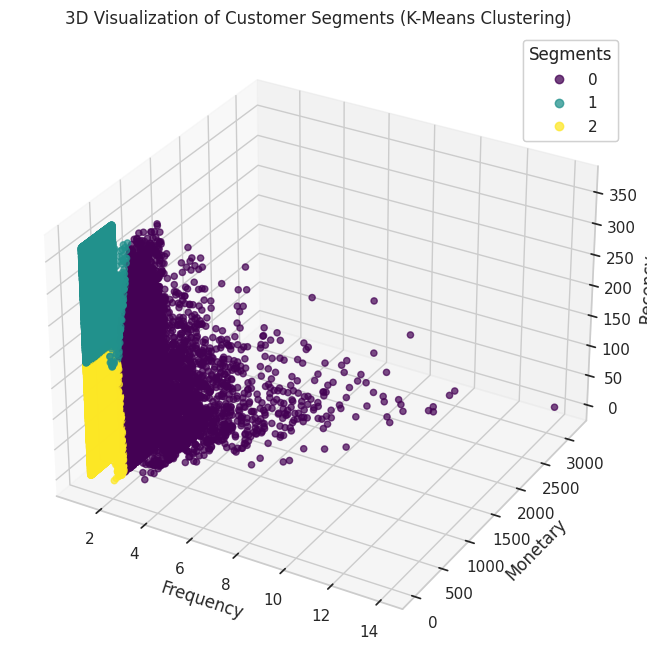

In [64]:
# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Segment'] = kmeans.fit_predict(rfm_scaled)

# Map cluster labels to meaningful names based on your criteria
segment_mapping = {
    0: 'New Customers',
    1: 'Passive Customers',
    2: 'High-Value Customers'
}
rfm['Segment_Name'] = rfm['Segment'].map(segment_mapping)

# View the RFM summary
rfm_sorted = rfm.sort_values(by='Monetary', ascending=False)

# 3D Visualization of the clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the segment codes for colors
scatter = ax.scatter(rfm['Frequency'], rfm['Monetary'], rfm['Recency'],
                     c=rfm['Segment'], cmap='viridis', alpha=0.7)

# Labels and title
ax.set_title('3D Visualization of Customer Segments (K-Means Clustering)')
ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Recency')

# Add color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Segments")
ax.add_artist(legend1)

plt.show()

In [65]:
# Group by the Segment and get descriptive statistics
segment_stats = rfm.groupby('Segment_Name')[['Recency', 'Frequency', 'Monetary']].describe()

# Display the descriptive statistics
segment_stats.T

Segment_Name     High-Value Customers  New Customers  Passive Customers
Recency   count          54106.000000    7610.000000       54429.000000
          mean              90.821443     111.564520         273.970439
          std               52.962113      81.623981          52.903487
          min                0.000000       0.000000         182.000000
          25%               45.000000      43.000000         228.000000
          50%               91.000000      97.000000         274.000000
          75%              137.000000     167.000000         320.000000
          max              183.000000     358.000000         365.000000
Frequency count          54106.000000    7610.000000       54429.000000
          mean               1.005637       2.331800           1.003381
          std                0.074869       0.825185           0.058045
          min                1.000000       2.000000           1.000000
          25%                1.000000       2.000000           1.000000
          50%                1.000000       2.000000           1.000000
          75%                1.000000       2.000000           1.000000
          max                2.000000      14.000000           2.000000
Monetary  count          54106.000000    7610.000000       54429.000000
          mean             254.109961     615.156407         254.899645
          std              141.306891     288.459453         141.489510
          min               10.006769     142.049276          10.000219
          25%              132.305418     424.661569         132.261573
          50%              253.406856     566.592262         255.191681
          75%              376.916400     743.821792         377.419386
          max              499.975408    3158.551187         499.954725